### Logistic Regression

In [1]:
using Pkg
Pkg.installed()

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\Users\paulo\AppData\Local\Programs\Julia-1.11.4\share\julia\stdlib\v1.11\Pkg\src\Pkg.jl:787


Dict{String, VersionNumber} with 8 entries:
  "CSV"           => v"0.10.15"
  "Statistics"    => v"1.11.1"
  "LinearAlgebra" => v"1.11.0"
  "IJulia"        => v"1.26.0"
  "Plots"         => v"1.40.11"
  "Random"        => v"1.11.0"
  "DataFrames"    => v"1.7.0"
  "GLM"           => v"1.9.0"

In [40]:
using CSV
using DataFrames
dataset = CSV.read("camera.csv", DataFrame)
X = dataset[:,"price"];
Y = dataset[:,"camera_mp"];
names(dataset)

2-element Vector{String}:
 "price"
 "camera_mp"

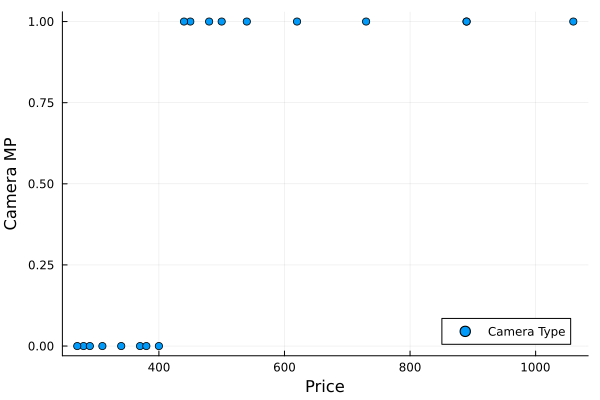

In [13]:
using Plots
#scatter(X,Y, xlabel="Price", ylabel="Camera MP", labels="Camera Type")
scatter(dataset.price, dataset.camera_mp, xlabel="Price", ylabel="Camera MP", labels="Camera Type")

### Logistic Regression Method

In [14]:
using GLM
model = glm(@formula(camera_mp ~ price), dataset, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

camera_mp ~ 1 + price

Coefficients:
────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      z  Pr(>|z|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -349.418     36976.7     -0.01    0.9925  -72822.5    72123.7
price           0.831995     88.0227   0.01    0.9925    -171.689    173.353
────────────────────────────────────────────────────────────────────────────

In [37]:
predict(model, DataFrame(price=[390, 400, 410, 420, 430, 440]))

6-element Vector{Union{Missing, Float64}}:
 1.4747798971510824e-11
 6.053923997768041e-8
 0.00024844991845195336
 0.5049829480810446
 0.9997612573735242
 0.9999999418266791

In [41]:
z = -1 .* (0.831995 .* sort(X).- 349.418);
log_model = 1 ./ (1 .+ exp.(z));

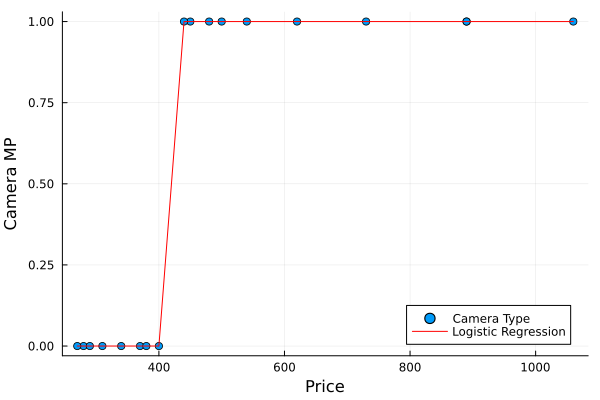

In [42]:
scatter(dataset.price, dataset.camera_mp, xlabel="Price", ylabel="Camera MP", labels="Camera Type")
plot!(sort(X), log_model, labels="Logistic Regression", color=:red, linestyle=:solid)